In [26]:
from sklearn.utils import shuffle

%run data.py
%run images_proc.py
%run cnn.py

In [27]:
x_data, y_data = load_data(TRAIN_SET_DATA_FILE)
x_data = preprocess_images(x_data)

x_train, x_validation, y_train, y_validation = split_data(x_data, y_data)

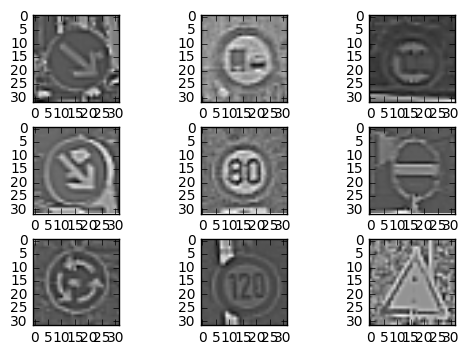

In [28]:
_ = plot_images(x_train[0:9]).show()

In [29]:
EPOCHS = 3
BATCH_SIZE = 256

filter_size1 = 4
num_filters1 = 8

filter_size2 = 5
num_filters2 = 16

fc_size = 128

img_size = x_train[0].shape[0]
img_size_flat = x_train[0].shape[1] * x_train[0].shape[0]
img_shape = (img_size, img_size)

num_channels = x_train[0].shape[2]
num_classes = max(y_train)+1

stddev=0.1
rate = 0.0001

In [30]:
#tf.reset_default_graph() 

keep_prob = tf.placeholder(tf.float32, (None), name='Placeholderkeepprob')
x = tf.placeholder(tf.float32, (None, img_size, img_size, num_channels), name='PlaceholderX')
y = tf.placeholder(tf.int32, (None), name='PlaceholderY')

one_hot_y = tf.one_hot(y, num_classes, name='onehoty')

layer_conv1, weights_conv1 = new_conv_layer(x, num_channels, filter_size1, num_filters1, True, name='layer1')
layer_conv2, weights_conv2 = new_conv_layer(layer_conv1, num_filters1, filter_size2, num_filters2, True, name='layer2')        

fc0 = flatten(layer_conv2)
fc1 = new_fc_layer(fc0,1024,fc_size, name='fc1')
dropout = tf.nn.dropout(fc1, keep_prob, name='dropout1')
    
logits = new_fc_layer(dropout,fc_size,num_classes, name='fc2')


Layer: [4, 4, 1, 8]
Layer: [5, 5, 8, 16]


In [31]:
x.name

'PlaceholderX_5:0'

In [32]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1), name='correctprediction')
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracyoperation')

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y, name='crossentropy')
loss_operation = tf.reduce_mean(cross_entropy, name='lossoperation')

optimizer = tf.train.AdamOptimizer(learning_rate = rate, name='AdamOptimizer')
training_operation = optimizer.minimize(loss_operation, name='trainingoperation')

In [33]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        xx, yy = (x_train,y_train)
        
        #xx, yy = balanced_subsample(X_train, y_train)
        yy = yy.astype(int)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = xx[offset:end], yy[offset:end]
            sess.run(training_operation, 
                     feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(accuracy_operation, x_validation, y_validation, x, y, keep_prob)
        print("{} Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, 'models/traffic_sign_classifier')
    print("Model saved")

Training...

1 Validation Accuracy = 0.130
2 Validation Accuracy = 0.232
3 Validation Accuracy = 0.296


TypeError: Cannot interpret feed_dict key as Tensor: The name 'save_1/Const:0' refers to a Tensor which does not exist. The operation, 'save_1/Const', does not exist in the graph.

In [20]:
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
    saver.restore(sess, 'models/traffic_sign_classifier.meta')
    print("Model restored.")

DataLossError: Unable to open table file models/traffic_sign_classifier.meta: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
	 [[Node: save_1/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_1/Const_0, save_1/RestoreV2/tensor_names, save_1/RestoreV2/shape_and_slices)]]

Caused by op 'save_1/RestoreV2', defined at:
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-665995b5e9df>", line 1, in <module>
    saver = tf.train.Saver()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1000, in __init__
    self.build()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1030, in build
    restore_sequentially=self._restore_sequentially)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 624, in build
    restore_sequentially, reshape)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 361, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 200, in restore_op
    [spec.tensor.dtype])[0])
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 441, in restore_v2
    dtypes=dtypes, name=name)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

DataLossError (see above for traceback): Unable to open table file models/traffic_sign_classifier.meta: Data loss: not an sstable (bad magic number): perhaps your file is in a different file format and you need to use a different restore operator?
	 [[Node: save_1/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_1/Const_0, save_1/RestoreV2/tensor_names, save_1/RestoreV2/shape_and_slices)]]


In [25]:
#tf.reset_default_graph() 

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('models/traffic_sign_classifier.meta')
    loader.restore(sess, tf.train.latest_checkpoint('models/.'))

    test_accuracy = evaluate(x_validation, y_validation, x,y,keep_prob)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

NotFoundError: Key Variable_14 not found in checkpoint
	 [[Node: save/RestoreV2_6 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_6/tensor_names, save/RestoreV2_6/shape_and_slices)]]

Caused by op 'save/RestoreV2_6', defined at:
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-2420ce10b50d>", line 4, in <module>
    loader = tf.train.import_meta_graph('models/traffic_sign_classifier.meta')
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1526, in import_meta_graph
    **kwargs)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/framework/meta_graph.py", line 502, in import_scoped_meta_graph
    producer_op_list=producer_op_list)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/framework/importer.py", line 285, in import_graph_def
    op_def=op_def)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/tadas/anaconda3/envs/tf/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key Variable_14 not found in checkpoint
	 [[Node: save/RestoreV2_6 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_6/tensor_names, save/RestoreV2_6/shape_and_slices)]]
